In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

visualizing data
generate dataset for training

In [2]:
image_size = [224, 224, 3] # fix image size

In [3]:
train_dir = 'dataset/train/' #training dataset folder
test_dir = 'dataset/val/' #testing dataset folder

In [4]:
train_data_gen = ImageDataGenerator(rescale=1. / 225)
test_data_gen = ImageDataGenerator(rescale=1. / 225 )

In [5]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(224,224), class_mode='categorical', batch_size=64)
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(224,224), class_mode='categorical', batch_size=64)

Found 16800 images belonging to 21 classes.
Found 2100 images belonging to 21 classes.


building deep learning model using pre trained weights 

In [6]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=image_size)

In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [10]:
model = Sequential([
    vgg,
    GlobalAveragePooling2D(),
    Dense(500, activation='relu'),
    Dense(200, activation='relu'),
    Dense(7, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 500)               256500    
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 21)                4221      
                                                                 
Total params: 15075609 (57.51 MB)
Trainable params: 360921 (1.38 MB)
Non-trainable params: 14714688 (56.13 MB)
___________

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_data, 
    validation_data=test_data,
    epochs=10,
)

Epoch 1/5
263/263 [==============================] - 2574s 10s/step - loss: 1.3142 - accuracy: 0.5612 - val_loss: 0.8728 - val_accuracy: 0.6781
Epoch 2/5
263/263 [==============================] - 3000s 11s/step - loss: 0.7420 - accuracy: 0.7236 - val_loss: 0.6939 - val_accuracy: 0.7443
Epoch 3/5
263/263 [==============================] - 5278s 20s/step - loss: 0.6227 - accuracy: 0.7673 - val_loss: 0.6698 - val_accuracy: 0.7476
Epoch 4/5
263/263 [==============================] - 10482s 40s/step - loss: 0.5582 - accuracy: 0.7919 - val_loss: 0.5962 - val_accuracy: 0.7895
Epoch 5/5
263/263 [==============================] - 14720s 56s/step - loss: 0.5056 - accuracy: 0.8099 - val_loss: 0.5115 - val_accuracy: 0.8148


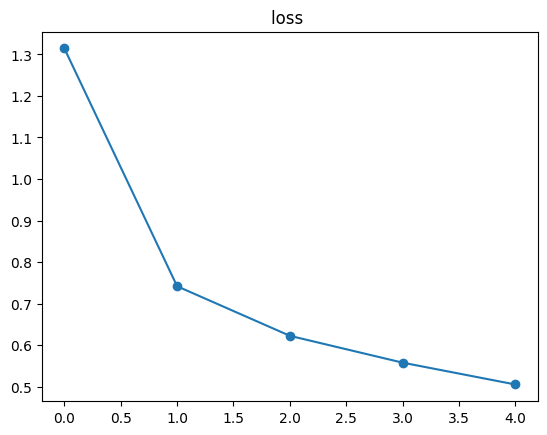

In [14]:
plt.title('loss ')
plt.plot(history.history['loss'], marker='o')

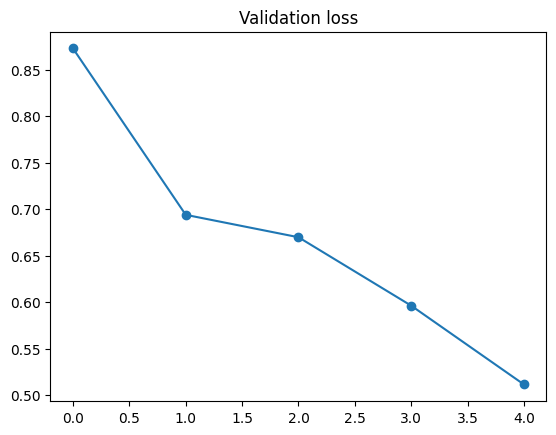

In [15]:
plt.title('Validation loss')
plt.plot(history.history['val_loss'], marker = 'o')

building a custom deep learning model 

In [16]:
model.save('vgg16_epochs_5.h5')

c:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
